In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wave 
from scipy.io.wavfile import write

In [5]:
spf = wave.open('audio/helloworld.wav' , 'r')
signal = spf.readframes(-1)
signal = np.fromstring(signal , 'Int16')
print("numpy.signal : " , signal.shape)

numpy.signal :  (18432,)


C:\Users\Rakshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rakshit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


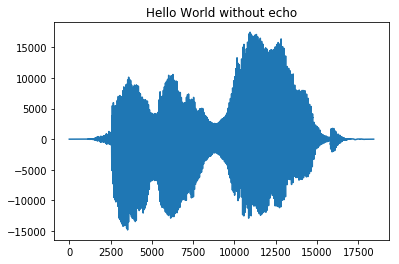

In [6]:
plt.plot(signal)
plt.title('Hello World without echo')
plt.show()

In [7]:
delta = np.array([1 , 0 , 0])
noecho = np.convolve(signal , delta)
print("No echo signal : " , noecho.shape)


No echo signal :  (18434,)


In [8]:
noecho = noecho.astype(np.int16)
write('noecho.wav' , 16000 , noecho)
N = 16000
filt = np.zeros(N)
filt[0] = 1
filt[4000] = 0.6
filt[8000] = 0.3
filt[12000] = 0.2
filt[N - 1] = 0.1

out = np.convolve(signal , filt)
out = out.astype(np.int16)
write('audio/out.wav' , N , out)